### Student Name: Lee Yu Xian
### Student Number: 7233164
### Student Name: Chong Hui Wen
### Student Number: 7311436
### Student Name: Kaycee Tan Wan Ching
### Student Number: 7311540

#### Group 6, Assignment 1

Classification Algorithms
- Random Forest
- Naive Bayes Classifier
- Decisioin Tree Classifier

In [2]:
# import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score

### Discover and visualise the data

In [29]:
# define the header for each columns
columns_name = [
                "date", "Usage_kWh", "Lagging_Current_Reactive.Power_kVarh", 
                "Leading_Current_Reactive_Power_kVarh",
                "CO2(tCO2)", "Lagging_Current_Power_Factor",
                "Leading_Current_Power_Factor", "NSM", "WeekStatus","Day_of_week",
                "Load_Type"
            ]

# read data from csv file
#df = pd.read_csv('Steel_industry_data.csv', names = columns_name, skiprows = 1)

df = pd.read_csv ('C:/Users/Chwlu/OneDrive - University of Wollongong/UOW/SEM 3.2/CSCI316 - Big Data Mining Techniques and Implementation/Assignment/A1/Group/Steel_industry_data.csv',  names = columns_name, skiprows = 1) 

# display the first 5 rows of data
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [30]:
# check the shape of the dataframe
df.shape

(35040, 11)

#### Findings:

(1) Based on the Pandas' .shape function, it shows this dataframe contains 35040 rows and 11 columns (including target column).

In [31]:
print(df['Load_Type'].unique())

['Light_Load' 'Medium_Load' 'Maximum_Load']


In [32]:
# display all columns and their data types 
# and check whether each column contains null values

encoding_values = {"WeekStatus": {"Weekday":0, "Weekend":1},
                   "Day_of_week": {"Monday":0, "Tuesday":1, "Wednesday":2, 
                                   "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6},
                   "Load_Type": {"Light_Load":0, "Medium_Load":1, "Maximum_Load":2}}

df_encoded = df.replace(encoding_values)

# df.Day_of_week.replace(to_replace='Monday',value=1)

#df.WeekStatus.replace(to_replace='Weekday',value=0)

# df.head()

df_encoded.drop(['date'], axis = 1, inplace=True)

df_encoded.head()

# df_encoded.info()
# df.info()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,0,0


#### Findings:

(1) We use Pandas dataframe.info () function gives a summary of this dataframe which shows that this dataframe has 55 columns(including target column), each column has 35040 rows, each column has no null value and each column's datatype consist of int64.

#### Findings:

(1) Some of the columns are not represented in the statistical details of the dataset as columns WeekStatus, Day_of_week and Load_type are object variables and not numerical values.

(2) Week Status and Day_of_week will be hot encoded, as such so both of them could be used to do analysis.

(3) Therefore we will nominaly encode the columns as such

WeekStatus = {"Weekday" = 0 , "Weekend" = 1}

Day_of_week = {"Monday" = 0,"Tuesday" = 1,"Wednesday" = 2,"Thursday" = 3,"Friday" = 4,"Saturday"= 5,"Sunday" = 6}

Load_Type = {"Light_Load" = 0,"Medium_Load" = 1, "Maximum_Load" = 2}

In [33]:
# view some basic statistical details of this dataframe
df_encoded.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,0.284932,2.991781,0.691781
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,0.451388,2.003433,0.792658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,0.000000,1.000000,0.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,0.000000,3.000000,0.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,1.000000,5.000000,1.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,1.000000,6.000000,2.000000


In [34]:
# print out the skewness of each features

print('Skewness of all the features: ')
skewness = df_encoded.skew()
print(skewness)

Skewness of all the features: 
Usage_kWh                               1.197394
Lagging_Current_Reactive.Power_kVarh    1.437899
Leading_Current_Reactive_Power_kVarh    1.734314
CO2(tCO2)                               1.149355
Lagging_Current_Power_Factor           -0.606126
Leading_Current_Power_Factor           -1.511984
NSM                                     0.000000
WeekStatus                              0.952975
Day_of_week                             0.003109
Load_Type                               0.606465
dtype: float64


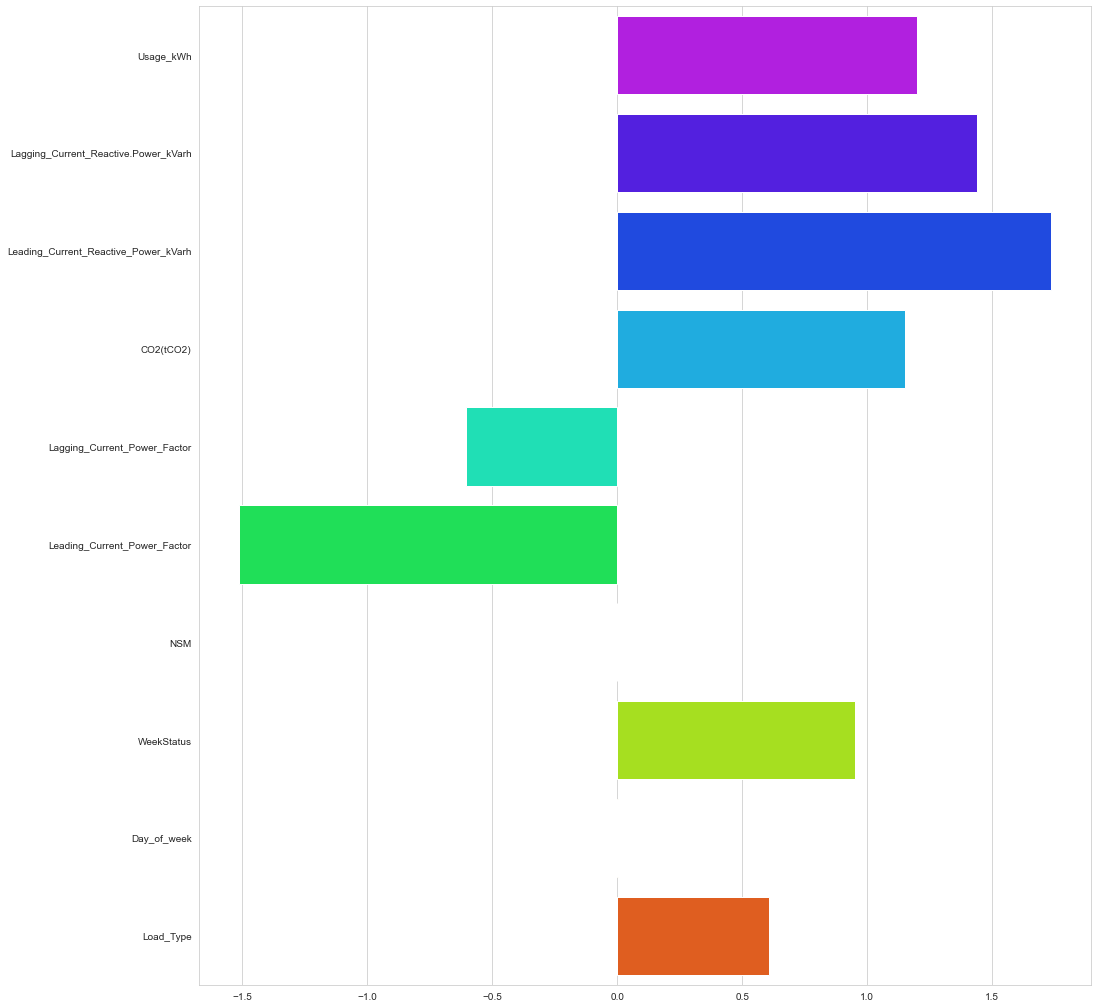

In [35]:
# set up the figure size 
plt.figure(figsize=(16,18))

# plot out the diagram to have a clear view of the skewness
sns.barplot(x=df_encoded.skew(), y=skewness.index, palette = 'gist_rainbow_r')

# show the plot
plt.show()

#### Findings:

Usage_kWh                               1.197394
Lagging_Current_Reactive.Power_kVarh    1.437899
Leading_Current_Reactive_Power_kVarh    1.734314
CO2(tCO2)                               1.149355

Leading_Current_Power_Factor           -1.511984

(1) 'Usage_kWh', 'Lagging_Current_Reactive', 'Leading_Current_Reactive_Power_kVarh' and 'CO2(tCO2)' have the extreme right skewed, having values more than 1.

(2) 'Leading_Current_Power_Factor' have the extreme left skewed, having a value of less than 1.

In [53]:
#  returns the correlation matrix of the dataframe
corr_matrix = df_encoded.corr()
corr_matrix = corr_matrix['Load_Type'].sort_values(ascending=False)
corr_matrix.head()

Load_Type                       1.000000
Usage_kWh                       0.614570
CO2(tCO2)                       0.610653
Lagging_Current_Power_Factor    0.519189
NSM                             0.482767
Name: Load_Type, dtype: float64

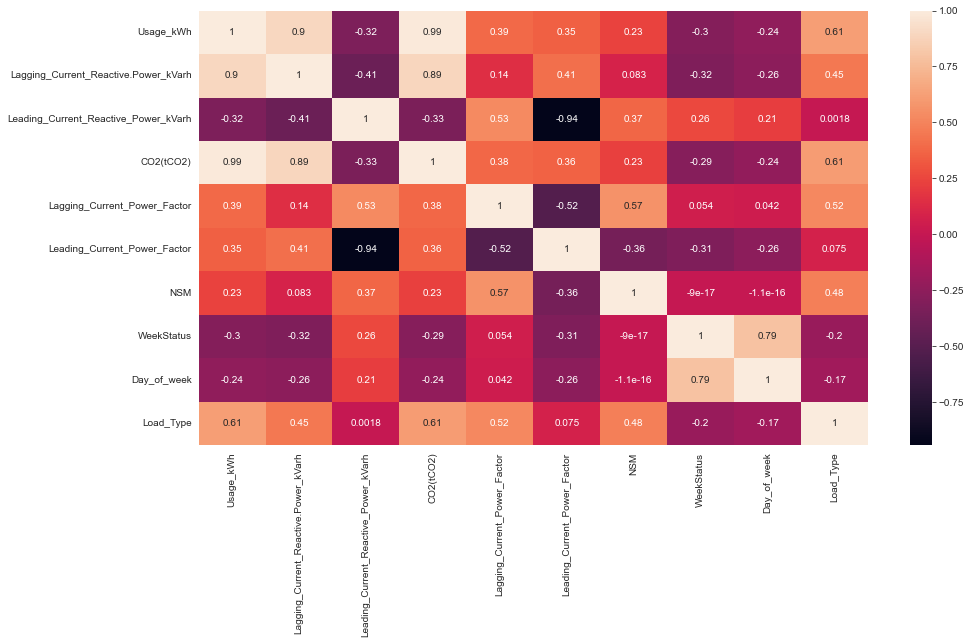

In [37]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(15,8))

# using heapmap to plot
sns.heatmap(df_encoded.corr(), annot=True)

# show the plot
plt.show()

# Findings

(1) There seems to be positive correlations against 'Load_Type' with  attributes such as 'Usage_kWh','CO2(tCO2)','Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM' with p value close to and greater than 0.5

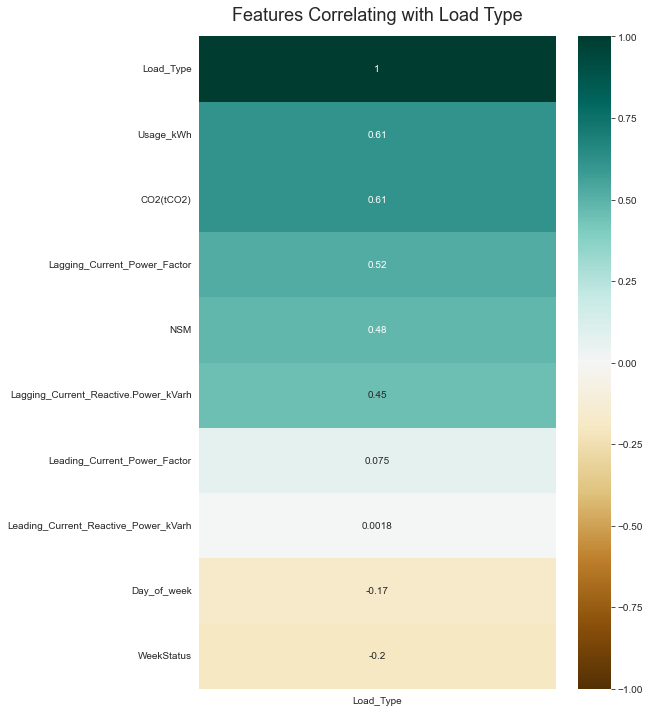

In [38]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_encoded.corr()[['Load_Type']].sort_values(by='Load_Type', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Load Type', fontdict={'fontsize':18}, pad=16);

#### Findings: 

0.9 to 1 positive or negative indicates a very strong correlation.
0.7 to 0.9 positive or negative indicates a strong correlation.
0.5 to 0.7 positive or negative indicates a moderate correlation.
0.3 to 0.5 positive or negative indicates a weak correlation.
0 to 0.3 positive or negative indicates a negligible correlation.

Based on above, we can notice that:

(1) CO2 (tCO2) has a strong positive correlation with the target (Load_Type), which gives 0.61. As such, this means that from CO2 (tCO2) we are able to get good information for Load_Type. 

(2) Next, from the figutre, Usage_kWh has a strong positive correlation with the target (Load_Type), which gives 0.61. This means we are able to get good information for Load_Type. 

(3) The weakest correlation is Leading_Current_Reactive_Power_kVarh, which gives a negative correlation of 0.0018. This means we are unable to use the attribute to get useful information regarding Load_Type. 

(4) The second weakest correlation is Leading_Current_Power_Factor which give a negative correlation of -0.075.

In [13]:
# show the tota number of each cover types in this dataframe
df.groupby('Load_Type').size()

Load_Type
Light_Load      18072
Maximum_Load     7272
Medium_Load      9696
dtype: int64

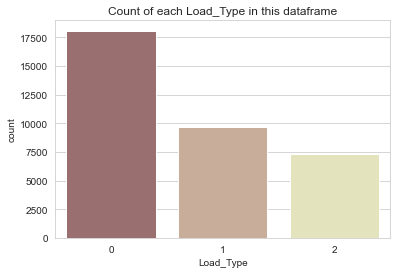

In [39]:
# visualize the count of each 'Cover_Type' in this dataframe
plt.title('Count of each Load_Type in this dataframe')
sns.set_style('whitegrid')
sns.countplot(x=df_encoded['Load_Type'], palette = 'pink')

plt.show()

#### Findings:

(1) The most number of count of Cover Type is Light_Load. The second most count for Load_Type would be Medium_Load. As such, the figure shows that Light_Load and Medium_Load are the most frequently used. 

(2) The least number of count of Load Type is Maxiumum_Load.

(1) The highest count of Load Type is Light_Load, consisting of count 18072. 

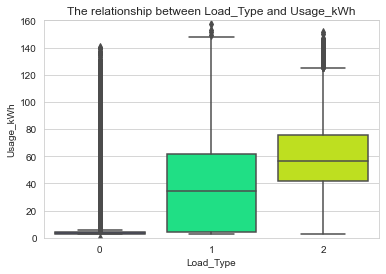

In [40]:
# Visualize the relationship between cover_type and elevation
plt.title('The relationship between Load_Type and Usage_kWh')

graph = sns.boxplot(data=df_encoded, x='Load_Type', y='Usage_kWh', palette='gist_rainbow_r')
graph.set_ylim(0, 160)

plt.show()

#### Findings:

(1) Maxium_Load is the highest elevation level, which median falls around 50. It also contains upper outliner falling between 120-150. 

(2) As compared with the other Load Types, most of the Medium_Load are in the lowest elevation level, in whih the median falls around 40, and contains upper outliers. Its minimuum usage_kWh is at 0 at maximum around 60. 

(3) Light_Load has all outliers and no distict median, representing a high variance. 

(4) Not accounting for outliers, Light_Load should be easily distinguishable from Medium and Maximum_Load. 

(5) If used alone, It might not be a good discriminative feature.

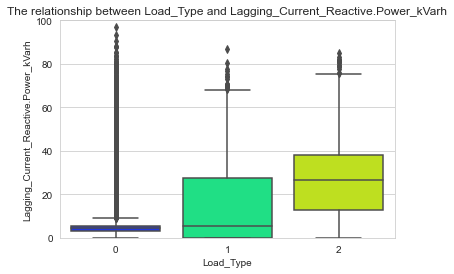

In [41]:
# Visualize the relationship between Load_Type and Lagging_Current_Reactive.Power_kVarh
plt.title('The relationship between Load_Type and Lagging_Current_Reactive.Power_kVarh')

graph = sns.boxplot(data=df_encoded, x='Load_Type', y='Lagging_Current_Reactive.Power_kVarh', palette='gist_rainbow_r')
graph.set_ylim(0, 10)

plt.show()

#### Findings:

(1) Light_Load contains the most number of upper outliers, falling between 10 and 100. 
As such, this might make it difficult to predict. 

(2) All of the load contains outliers. 

(3) The 1st quartile of Light_Load falls around 5, which is the same as Medium_Load. 

(4) The median for Maxium_Load is the highest at 30. 

(5) The minimum and maximum for Medium_Load and Maximum_Load is the same which is 0 and 90, whereas the maximum for Light_Load reaches to 100. 

(6) This is a not a recommended feature since there are a lot of outliers which can skew the results.

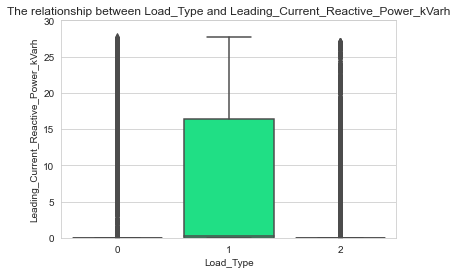

In [42]:
# Visualize the relationship between Load_Type and Leading_Current_Reactive_Power_kVar
plt.title('The relationship between Load_Type and Leading_Current_Reactive_Power_kVarh')

graph = sns.boxplot(data=df_encoded, x='Load_Type', y='Leading_Current_Reactive_Power_kVarh', palette='gist_rainbow_r')
graph.set_ylim(0, 30)

plt.show()

#### Findings:

(1) Light_Load and Maximum_Load has a significant number of outliers, except Medium_4 where there is no outliers at all.

(2) All of the Load Types have the same minimum slope which is 0.

(3) Light_Load has the most outliers are compared with the other Load Types, and its outlier reaches around 28. From this, we can deduce that there are many unusual observations for Light_Load Type. 

(4) Medium_Load has a median of around 7.

(5) As such, with large amount of outliers observed, this suggests that it is not a good feature in determing load type. 

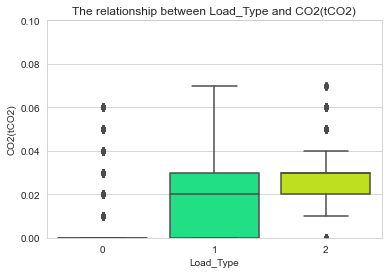

In [43]:
# Visualize the relationship between cover_type and Horizontal_Distance_To_Hydrology
plt.title('The relationship between Load_Type and CO2(tCO2)')

graph = sns.boxplot(data=df_encoded, x='Load_Type', y='CO2(tCO2)', palette='gist_rainbow_r')
graph.set_ylim(0, 0.1)

plt.show()

#### Findings:

(1) Light_Load consists of outliers, thus there is no fixed range. Light_Load minimum value also does not start with 0. There seems to not be an interquartile range, which might be because majority of the CO2 values are O.OO. 

(2) The upper quartile range for Medium_Load falls between 0.03 to 0.07, whereas it falls between 0.03 to 0.04 for Maximum_Load. 

(3) Only Maximum_Load has upper outliers. Medium_Load does not contain any outliers. 

(4) Medium_Load has the maximum value of CO2 of 0.07. 

(5) The range of the load type typically falls between the range of 0.00 to 0.07. 

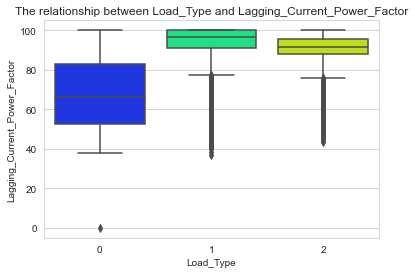

In [44]:
# Visualize the relationship between Load_Type and Lagging_Current_Power_Factor
plt.title('The relationship between Load_Type and Lagging_Current_Power_Factor')
sns.boxplot(data=df_encoded, x='Load_Type', y='Lagging_Current_Power_Factor', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) All 3 Load Type have lower outliers, with Light_Load at 0, and Medium_Load and Heavy_Load ranging from 39 to around 80. 

(2) All the load types do not contain any upper outliers. 

(3) Majority of the Lagging_Current_Power_Factor falls in the Medium.

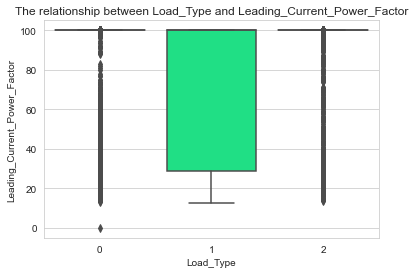

In [45]:
# Visualize the relationship between Load_Typee and Leading_Current_Power_Factor
plt.title('The relationship between Load_Type and Leading_Current_Power_Factor')
sns.boxplot(data=df_encoded, x='Load_Type', y='Leading_Current_Power_Factor', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) There are outliers for Light_Load and Heavy_Load, and there are no outliers for Medium_Load.  

(2) The median for Medium_Load is at 60. 

(3) Most of the outliers are from the range between 10 to 100, with Light_Load having one outlier starting at 0. 

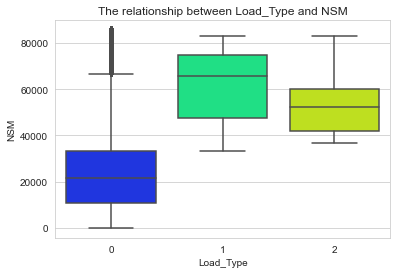

In [46]:
# Visualize the relationship between Load_Type and NSM
plt.title('The relationship between Load_Type and NSM')
sns.boxplot(data=df_encoded, x='Load_Type', y='NSM', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) As above boxplots, only Light_Load has outliers ranging from around 65000 to 85000. 

(2) Medium_Load and Heavy_Load does not have any outliers. 

(3) The Median differs greatly for all three load types, Light_Load around 21000, Medium_Load around 65000 and Heavy_Load around 70000. 

(4) Light_Load still follows the trend of consisting of excessive outliers. 

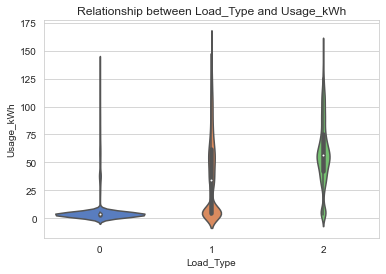

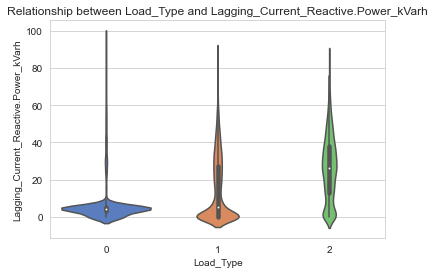

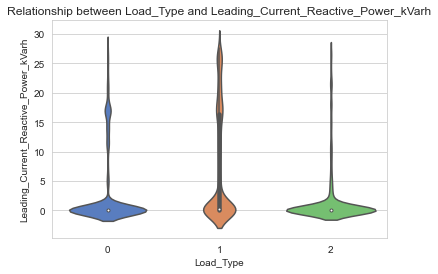

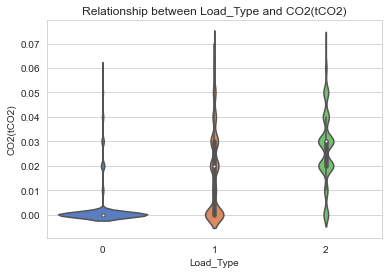

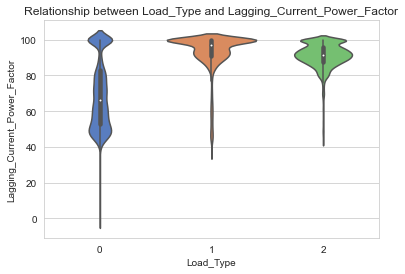

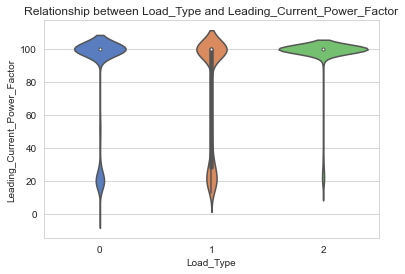

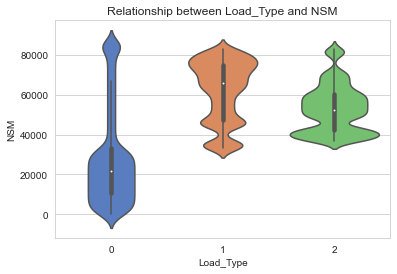

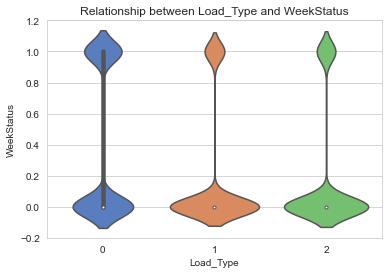

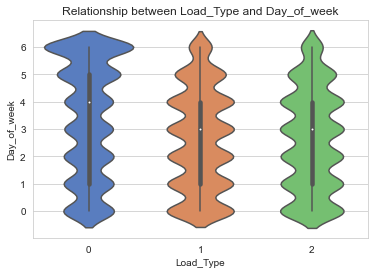

In [57]:
# get all the columns name
all_columns = df_encoded.columns

# eliminate th target column
eliminate_target = len(all_columns)-1

# x-axis is for target column
x = all_columns[eliminate_target]

# y-axis is for the features
y = all_columns[0:eliminate_target]

# plot out the graph
for a in range(0, 9):
    sns.violinplot(data=df_encoded, x=x, y=y[a], palette="muted")
    
    # set the title for each of the graphes
    plt.title('Relationship between Load_Type and ' + all_columns[a])
    plt.show()

#### Findings:

(1) Based on the 40 violinplot graphes above, we can conclude that for Soil_Type 1, 5, 7, 8, 9, 12, 14, 15 18, 21, 22, 25-28 and 35-40 which have at least 4 Cover Types do not have any values.

### Prepare the data for machine learning algorithms

### We first check if the dataset consist of any missing values 

In [58]:
# Check any missing data for each columns
print(df_encoded.isnull().values.any())

False


#### Findings:

(1) It gives a False rusult which means that this dataframe does not consist any null values.

In [27]:
# seperate the dataset as feature variables and response variable and store them to X and y variables
X = df_encoded.drop('Load_Type', axis=1)
y = df_encoded['Load_Type']

# use StratifiedShuffleSplit to split the data 
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.33, random_state=42)
sss.get_n_splits(X,y)

# using for loop to do the splits
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#double check the size of the dataframe     
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

# using StandardScalar to help us impore the accuracy of the prediction model
scalar = StandardScaler()

# fit and transform the train data
X_train = scalar.fit_transform(X_train)

# transform the test data
X_test = scalar.transform(X_test)


(389278, 54) (191734, 54)
(389278,) (191734,)


#### Findings:

(1) After we used StratifiedShuffleSplit to split the data, now the amount of training data becomes 389278 and the amount of testing data becomes 191734.

## 3 Clssification Models

### (1) Random Forest

In [28]:
# instantiate the RandomForestClassifier() model
rfc = RandomForestClassifier(n_estimators=150, max_depth=15, criterion='gini', random_state=42, n_jobs=-1)

# fit the model with X_train and y_train
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, n_estimators=150, n_jobs=-1,
                       random_state=42)

In [29]:
# make prediction with X_test
y_pred = rfc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))

0.8249449758519616


In [30]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = rfc.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

0.8424210975189967


#### Findings:
    
(1) Based on the above result, we can see that when I set the parameter for the Random Rorest Classifier (n_estimators=150, max_depth=15, criterion='gini', random_state=42, n_jobs=-1) which give us 82.49% when using testing set data to do prediction. While we use the model to predict the tranind data, it gives us 84.24%. It only has 1.75% difference which is not much differences and we can say that the model does not occur overfitting issue so that the model is good for predicting both training and testing data.

### Tuning the Random Forest model

In [ ]:
# instantiate the RandomForestClassifier model and set the random_state =  42 to make sure we can get the same result everytime
rdfc = RandomForestClassifier(random_state=42)

# set the hyperparameters for the gridsearchcv to choose the best one
rdfc_param = {
              'n_estimators':[100, 300, 500],
              "criterion": ["gini", "entropy"],
              'max_depth': [15, 17],
              'max_features':['auto', 'sqrt']
             }

# instantiate the gridsearchcv to get the hyperparameter
rdfc_gscv = GridSearchCV(estimator=rdfc, param_grid=rdfc_param, cv=3, n_jobs=-1)

# fit the model with X_train and y_train
rdfc_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(rdfc_gscv.best_params_)

# print out the result
print(rdfc_gscv.best_score_)

In [ ]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = rdfc_gscv.predict(X_train)

# check our models performance
print('Accuracy : ',metrics.accuracy_score(y_train, y_pred)*100 ,'%')

#### Findings:

After tuning the model:

(1) First, we can see that the accuracy becomes 87.23% which compare with the accuracy 82.49% (without tuning) has a significant improvement of 5.84%.

(2) Next, the tuning model do a prediction of the testing set data is 87.23% and when predict the training data which get a result of 90.21%. It has only a 2.98% difference which does not occur the overfitting issue so that the model is good for predicting both training and testing data.

(3) Besides that, we can see that the max_depth in Random Forest Classifier has a huge impact. Since I set the max_depth = 15 when without tuning the model and it gives us 82.49%. However, when tuning the model, I set the max_depth in a range [15, 17] and it chose 17 which increase the accuracy to 87.23%. Therefore, we can conclude that the more number splits that each decision tree is allowed to make which get more information about the data. However, if we do not limit the max_depth of the tree which would occur a overfitting situation. Therefore, we need to try out different values of the max_depth to get the optimum result and avoid the overfitting.

(4) On the other hand, we notice that the n_estimors also has a huge affect on the model. Since in the model (without tuning), I set the n_estimors = 150 which give a 82.49%, but when tuning the model, I set the n_estimors in a range of [100, 300, 500] and the gridsearchcv took the maximun value which is 500 and the accuracy bacome 87.23%. Since we know that the n_estimors controls the number of tree inside the classifier and it might help us to generate a more generalized result but we need to try this case by case. Moreover, when I do tuning, it tooks more time to run this model as the gridsearchcv took a higher number of n_estimors as it generates more trees.

### (2) Naive Bayes Classifier

In [ ]:
# instantiate the GaussianNB() model
nbc = GaussianNB(var_smoothing=3e-9)

# fit the model with X_train and y_train
nbc.fit(X_train, y_train)

# make prediction with X_test
y_pred = nbc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))


In [ ]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = nbc.predict(X_train)

# check our models performanc
print(accuracy_score(y_train, y_pred))

#### Findings:

(1) When I set the parameter for the GaussianNB as (var_smoothing=3e-9) which do a prediction on the testing data and it gives a accuracy 8.81%. When using this model to predict training set data, it gives a 8.79%. Both accuracy only have 0.02% diffence which is not much diffences so it does not occur overfitting issue.

### Tuning the Naive Bayes Classifier

In [ ]:
# instantiate the GaussianNB() model
nbc2 = GaussianNB()

# set the hyperparameters for the gridsearchcv to choose the best one
# use var_smoothing as the hyperparameter
params = {'var_smoothing': np.logspace(0,-9, num=50)}

# using gridsearchcv to get the best hyperparameter
nbc2_gscv = GridSearchCV(estimator=nbc2, param_grid=params, cv=3, n_jobs=-1, scoring='accuracy') 

# fit the model with X_train and y_train
nbc2_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(nbc2_gscv.best_params_)

# print out the result
print(nbc2_gscv.best_score_)

In [ ]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = nbc2_gscv.predict(X_train)

# check our models performanc
print(accuracy_score(y_train, y_pred))

#### Findings：

After tuning the model:

(1) First, we can see that the accuracy becomes 46.79% which compare with the accuracy 8.81% (without tuning) has a significant improvement of 37.98%.

(2) Next, the tuning model do a prediction of the testing set data is 46.79% and when predict the training data which get a result of 46.08%. It has only a 0.71% difference which does not occur the overfitting issue.

(3) Since I set the parameter 'var_smoothing' in a larger range, and the gridsearchcv chose 1.0 as the best value for the model. Based on this result, we can conclude that the higher the 'var_smoothing' is, the accuracy become more higher also.

### (3) Decision Tree classifier

In [ ]:
# instantiate the DecisionTreeClassifier() model
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=13, random_state=42)

# fit the model with X_train and y_train
dtc.fit(X_train, y_train)

# make prediction with X_test
y_pred = dtc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = dtc.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

#### Findings:

(1) When I set the parameter for the Decision Tree Classifier as (criterion="entropy", max_depth=13, random_state=42) which do a prediction on the testing data and it gives a accuracy 82.32%. When using this model to predict training set data, it gives a 83.85%. Both accuracy only have 1.53% diffence which is not much diffences so it does not occur overfitting issue.

### Tuning the Decisioin Tree Classifier

In [ ]:
# tuning the Decision Tree model

# instantiate the DecisionTreeClassifier() model
dtc2 = DecisionTreeClassifier(random_state=42)

# set the hyperparameters for the gridsearchcv to choose the best one
dtc_param = { 
              "criterion": ["gini", "entropy"],
              "max_depth": [10, 13, 17],
              "min_samples_leaf": [1, 2, 3]
             }

# using gridsearchcv to get the best hyperparameter
dtc_gscv = GridSearchCV(estimator=dtc2, param_grid=dtc_param, cv=3, n_jobs=-1)

# fit the model with X_train and y_train
dtc_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(dtc_gscv.best_params_)

# print out the result
print(dtc_gscv.best_score_)


In [ ]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = dtc_gscv.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

#### Findings:

After tuning the model:

(1) First, we can see that the accuracy becomes 87.66% which compare with the accuracy 82.32% (without tuning) has a significant improvement of 5.34%.

(2) Next, the tuning model do a prediction of the testing set data is 87.67% and when predict the training data which get a result of 91.28%. It has only a 3.61% difference which does not occur the overfitting issue so that the model is good for predicting both training and testing data.

(3) On the other hand, we notice that in the parameter criteria the gridsearchcv chose 'Entropy' to be the hyperparameter. 

(4) Besides that, we can see that the max_depth in Decision Tree Classifier has a huge impact. Since I set the max_depth = 13 when without tuning the model and it gives us 82.32%. However, when tuning the model, I set the max_depth in a range [10, 13, 17] and it chose 17 which increase the accuracy to 87.67%. Therefore, we can conclude that the more number splits that each decision tree is allowed to make which get more information about the data. However, if we do not limit the max_depth of the tree which would occur a overfitting situation. Therefore, we need to try out different values of the max_depth to get the optimum result and avoid the overfitting.

(5) Furthermore, I set the parameter min_samples_leaf in a range of [1, 2, 3] and the gridsearchcv chose to use 1 as the min_samples_leaf which give a better accuracy also.

#### Finding of comparing these 3 classification models above:
    
In this task, we have used Random Forest model, Naive Bayes Classifier model and Decisioin Tree Classifier model to solve the classification problem.

Among these 3 models, Random Forest model and Decisioin Tree Classifier model work quite well in this task. Both models get an approximately 82% and 87% before and after tuning the models.

Besides that, these 3 models do not have any underfitting and overfitting problems as I have showed above.

Howver, Naive Bayes Classifier model gives a poor result in solving the classification problem of this task even after tuning the model.


## User-Defined Transform functionality

In [ ]:
# define a class to generate a user-defined-transform function
class UserDefinedTransform(BaseEstimator, TransformerMixin):
    # initialize the constructor
    def __init__(self, elevation_lvl=True):
        self.elevation_lvl = elevation_lvl
    
    # define a fit function
    def fit(self, X, y=None):
        return self
    
    # define a transform function 
    def transform(self, X, y=None):
        # using if else statement to take different actions
        if self.elevation_lvl:
            
            # divide into the different elevation range and insert them into the columns called Elevation_Group
            df['Elevation_Level'] = pd.cut(df['Elevation'], 3, precision=0, labels=['1', '2', '3'])
            
            # insert the column Elevation_Group to the right position
            elevation_lvl = df.pop('Elevation_Level')
            df.insert(1, 'Elevation_Level', elevation_lvl)
            
            # retrun the result
            return np.c_[X, elevation_lvl]
        else:
            # alert the user if got any error to create a new feature
            return print("Please check the values of 'Elevation'")

#### Findings:

(1) We generate a new feature called 'Elevation_Level' since the feature 'Elevation' contains many different values and do not have a specific range for the models to do prediction.

(2) The new feature 'Elevation_Level' has categorize the Elevation values into 3 catrgories which has 1, 2 and 3 so that we can based on this new feature to see the elevation each Cover Type belong to low, median or high. But in our case, we use number instead of string to label the category.


In [ ]:
# show the original X.shape
X.shape

#### Findings:
    
(1) Before transform the new feature ('Elevation_Level'), X contains 581012 rows and 54 columns (exclude the target column).

In [ ]:
# create the class object and transfrom the new feature then show the shape of dataframe which excluding the target column
attr_adder = UserDefinedTransform(elevation_lvl=True)
attr_adder.transform(X).shape

#### Findings:

(1) After transform the new feature ('Elevation_Level'), X contains 581012 rows and 55 columns (exclude the target column).

In [ ]:
# displa the new feature 'Elevation_Level' in the dataframe
df['Elevation_Level']

In [ ]:
# plot out the graph to see the categories of the Elevation of each Cover_Type belongs to
plt.scatter(df['Cover_Type'], df['Elevation_Level'], c='red')

# set the graph title
plt.title('The categories of the Elevation of each Cover_Type belongs to')

# set the xlabel and ylabel
plt.xlabel('Cover_Type')
plt.ylabel('Elevation_Level')

# show the graph
plt.show()

#### Findings:

(1) Based on the graph above, we can see that most of the Cover Types are in Elevatioin_Level 1 and 2, except Cover Type 7 which does not appear any in Elevation_Level 1. Also, the elevation level of Cover Type 1 and 2 are average distribution which appear in all 3 elevation level 1, 2 and 3. 

(2) Next, we notice that only Cover Type 1, 2 and 7 have in Elevatioin_Level 3. Hence, we can conclude that Cover Type 3, 4, 5, and 6 do not grow in the elevation level 3 based on this dataset.